In [1]:
import numpy as np
import pandas as pd


from sklearn.preprocessing import OneHotEncoder, PowerTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score

import seaborn as sns
import matplotlib as plt

In [2]:
data=pd.read_csv("aug_train.csv")

In [3]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
data.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [5]:
data["target"].value_counts()

,count
target,
0.0,14381
1.0,4777


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
data.shape

(19158, 14)

In [8]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [9]:
data["gender"].value_counts()

,count
gender,
Male,13221
Female,1238
Other,191


In [10]:
data["relevent_experience"].value_counts()
data["enrolled_university"].value_counts()
data["education_level"].value_counts()
data["major_discipline"].value_counts()
data["experience"].value_counts()

,count
experience,
>20,3286
5,1430
4,1403
3,1354
6,1216
2,1127
7,1028
10,985
9,980


In [11]:
data['experience'] = data['experience'].replace({
    '>20': 20,
    '<1': 0
})
data['experience'] = pd.to_numeric(data['experience'], errors='coerce')

In [12]:
print(data["experience"].dtype)

float64


In [13]:
data["last_new_job"].value_counts()

,count
last_new_job,
1,8040
>4,3290
2,2900
never,2452
4,1029
3,1024


In [14]:
data['last_new_job'] = data['last_new_job'].replace({
    '>4': 5,
    'never': 0
})
data["last_new_job"]=pd.to_numeric(data['last_new_job'], errors='coerce')

In [15]:
data['last_new_job'].dtype

dtype('float64')

In [16]:
data["company_size"].value_counts()

,count
company_size,
50-99,3083
100-500,2571
10000+,2019
10/49,1471
1000-4999,1328
<10,1308
500-999,877
5000-9999,563


In [17]:
data["company_type"].value_counts()

,count
company_type,
Pvt Ltd,9817
Funded Startup,1001
Public Sector,955
Early Stage Startup,603
NGO,521
Other,121


In [18]:
count=data["city"].value_counts()
count

,count
city,
city_103,4355
city_21,2702
city_16,1533
city_114,1336
city_160,845
...,...
city_111,3
city_129,3
city_121,3


In [19]:
# reducing the category
threshold=100
col=count[count<=threshold].index
data["city"]=data["city"].replace(col,"other")

In [20]:
data["city"].nunique()

35

In [21]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

<Axes: xlabel='training_hours', ylabel='Density'>

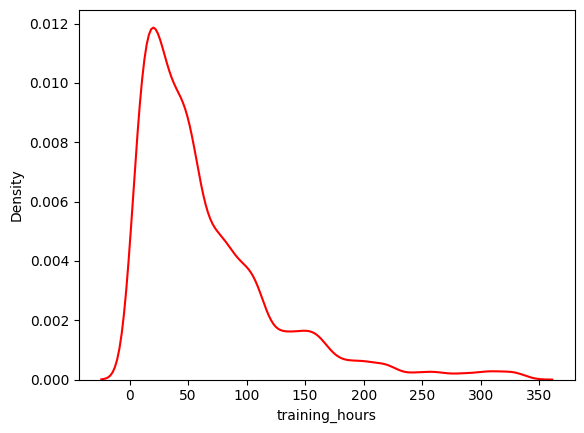

In [22]:
sns.kdeplot(data["training_hours"],color="red")

<Axes: xlabel='city_development_index', ylabel='Density'>

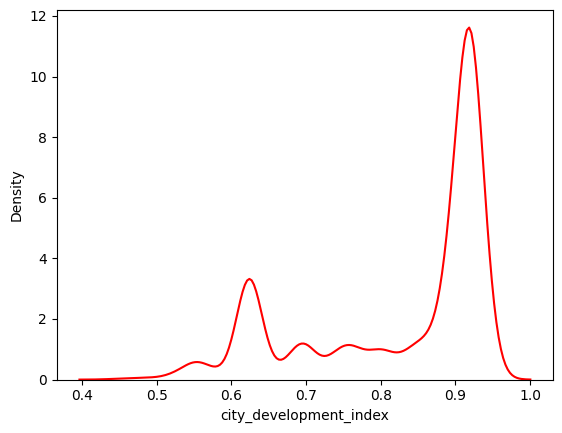

In [23]:
sns.kdeplot(data["city_development_index"],color="red")

In [24]:
X=data.drop(["enrollee_id","target"],axis=1)
Y=data["target"]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [26]:
for i, col in enumerate(x_train.columns):
    print(f"{i}: {col}")


0: city
1: city_development_index
2: gender
3: relevent_experience
4: enrolled_university
5: education_level
6: major_discipline
7: experience
8: company_size
9: company_type
10: last_new_job
11: training_hours


In [27]:
numcol=["city_development_index","experience","last_new_job","training_hours"]


category_order=[ ["No relevent experience","Has relevent experience"],
                ["no_enrollment","Full time course","Part time course"],
                ["Primary School","High School","Graduate","Masters","Phd"],
                ['<10','10/49','50-99','100-500','500-999','1000-4999','5000-9999','10000+'] ]
ordcol=['relevent_experience','enrolled_university','education_level','company_size']


ohecol=["city","gender","major_discipline","company_type"]

In [28]:
num_pipeline=Pipeline([("imputer",SimpleImputer(strategy="median")),
                    ("pow trans",PowerTransformer(method="yeo-johnson"))])

In [29]:
ord_pipeline=Pipeline([("imputer",SimpleImputer(strategy="most_frequent")),
                    ("ordinal",OrdinalEncoder(categories=category_order))])


In [30]:
ohe_pipeline=Pipeline([("imputer",SimpleImputer(strategy="constant")),
                    ("ohe",OneHotEncoder(handle_unknown="ignore",drop="first"))])

In [31]:
preprocess=ColumnTransformer([("numerical",num_pipeline,numcol),
                            ("ordinal",ord_pipeline,ordcol),
                            ("ohe",ohe_pipeline,ohecol)],remainder="passthrough")


In [32]:
model1=LogisticRegression(class_weight="balanced")

In [33]:
pipe = Pipeline([
    ('preprocess', preprocess),
    ('classifier', model1)
])

In [34]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('pow trans',
                                                                   PowerTransformer())]),
                                                  ['city_development_index',
                                                   'experience', 'last_new_job',
                                                   'training_hours']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('or...
                                                                                               '5000-9999',
                                                                                               '10000+']]))]),
                                                  ['relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'company_size']),
                                                 ('ohe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['city', 'gender',
                                                   'major_discipline',
                                                   'company_type'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [35]:
prediction=pipe.predict(x_test)
accuracytest=accuracy_score(y_test,prediction)
accuracytest

0.7600904662491301

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, prediction))  # Precision, recall, F1
print(confusion_matrix(y_test,prediction))       # TP, TN, FP, FN

# If using probability predictions:
y_prob = pipe.predict_proba(x_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      4306
         1.0       0.52      0.73      0.60      1442

    accuracy                           0.76      5748
   macro avg       0.70      0.75      0.72      5748
weighted avg       0.80      0.76      0.77      5748

[[3320  986]
 [ 393 1049]]
ROC AUC Score: 0.7861736808233906
